# Laboratorio Modulación AM

## Propósito

En esta tarea, explorará el uso de computadoras digitales para el análisis, diseño, síntesis y simulación de un sistema de modulación de amplitud (AM). En los sistemas de AM, una señal de información se multiplica por una sinusoide a una frecuencia mucho más alta. Esta técnica permite transmitir la señal de información por el aire a través de ondas electromagnéticas; en esencia, usar una señal de frecuencia más alta para "transportar" la señal de información. Debe estar familiarizado con la radio AM, que utiliza esta técnica; la frecuencia indicada en el dial de radio AM para cada estación es la frecuencia portadora.

En este experimento, explorará cómo la modulación, particularmente AM, impacta el espectro de la señal y cómo esta información se usa para simular la modulación y demodulación de una señal de audio. En el proceso, aprenderá sobre la distorsión resultante del submuestreo, llamada *aliasing*, y cómo prevenirla. Esto será particularmente importante en la simulación de un sistema de AM, ya que las señales moduladas tienen componentes de frecuencia sustancialmente más altos que las señales de audio. A partir de esta tarea, debe apreciar algunas de las ventajas y desventajas prácticas en el diseño de tecnologías de sistemas de AM y en el uso de señales CT (*continuous time signal*) muestreadas para la simulación de sistemas de AM.

## 1. Objetivos

Al final de esta asignación de laboratorio, debería poder:

1. Calcular, visualizar e interpretar los espectros de frecuencia de una señal modulada en amplitud.
2. Diseñar y utilizar filtros digitales para evitar el aliasing en su simulación por computadora de un sistema AM.
3. Utilizar su conocimiento del análisis de dominio de frecuencia y filtros digitales para diseñar y construir un sistema para modular y demodular señales de audio.
4. Evitar la creación de *aliasing* mediante el uso de filtros o cambiando la frecuencia de muestreo.

## 2. Referencia

**Temas de revisión**

1. Respuesta de frecuencia y filtrado 
2. Análisis de Fourier en CT
3. Transformadas y propiedades comunes de Fourier 

**Temas exploratorios**

1. Modulación y demodulación de amplitud
2. Muestreo y aliasing
3. Análisis digital de Fourier

## 3. Preparación del Laboratorio

**Pregunta 1**. Su objetivo es cambiar un tono de 100Hz hasta 150Hz usando modulación. Determine la frecuencia portadora necesaria para lograr este objetivo. Especifique el filtro, si lo hay, necesario para eliminar cualquier artefacto tonal no deseado resultante del proceso de modulación. Suponga que su filtro es ideal y especifique su tipo y frecuencias de corte. Ilustre su comprensión y verifique su solución dibujando los espectros de la señal original, la señal modulada y la señal modulada después del filtrado.

**Pregunta 2**. Suponga que $x(t)$ es una señal que tiene el espectro de frecuencia que se muestra en la figura 5.1 con $B = 2 \pi (100)$ radianes por segundo. ¿Cuál es la frecuencia de muestreo mínima $\omega_0$ que se puede usar para muestrear esta señal si no se produce el aliasing? Suponga que esta señal ahora se muestrea en $\omega_s = 2 \omega_0$. Dibuje la magnitud del espectro de frecuencia de la señal muestreada. Especifique el tipo, la ganancia y la frecuencia de corte de un filtro ideal que se puede utilizar para recuperar una réplica exacta de la señal original de sus muestras.

**Pregunta 3**. Ahora suponga que la señal de la Pregunta 2 se modula utilizando una portadora de 1kHz, lo que da como resultado la señal $x_m(t)$. ¿Cuál es la frecuencia mínima de muestreo a la que se puede muestrear $x_m(t)$ para garantizar que no se produzca *aliasing*? Dibuje los espectros de $x_m (t)$ y su contraparte muestreada si la frecuencia de muestreo es de 2kHz. ¿Habrá alguna distorsión de *aliasing*? Explica tu respuesta.

**Pregunta 4**. Ahora suponga que la señal $x(t)$, como se define en la Pregunta 2, se modula en amplitud utilizando una portadora de 1kHz, creando la señal modulada $x_m(t)$. Seleccione valores razonables para el índice de modulación y la amplitud de la portadora. El demodulador de AM en el receptor se muestra a continuación:

<img src="./fig31.png" width="500">
<center>Figura 3.1 Demodulador AM para Pregunta 4</center>

Dibuje $R(\omega)$. Especifique un filtro ideal tal que la salida sea $x(t - 0.1)$, como se muestra, es decir, la salida es una réplica exacta de la señal transmitida original desplazada en 100 ms. Especifique el tipo de filtro, la frecuencia de corte y la ganancia. Dibuje la magnitud y la fase de la respuesta de frecuencia del filtro.

## 4. Introducción

El propósito de esta tarea es exponerlo aún más a las aplicaciones del análisis digital de Fourier utilizando PYTHON. Estos temas se explorarán en el contexto del muestreo de señales de audio para el diseño y simulación de los procesos de modulación y demodulación utilizados en la modulación de amplitud. Dado que PYTHON es intrínsecamente de tiempo discreto, explorará consideraciones prácticas en el uso de la simulación digital y el análisis de Fourier para diseñar sistemas de audio.

## 5. Antecedentes

En las siguientes secciones, discutimos el efecto de la modulación de amplitud y el muestreo en el espectro de la señal utilizando propiedades comunes de la transformada de Fourier. Ambos temas se pueden analizar entendiendo el efecto de multiplicar una señal por una forma de onda periódica. Usamos esta información para proporcionar una vista intuitiva del análisis de Fourier digital como "muestreo" tanto de la señal de CT como de su espectro, y analizamos el filtrado digital, el cambio de frecuencia y el aliasing según sea necesario en el análisis y diseño de su sistema de AM.

**Cambio de Frecuencia**

¿Cómo podemos cambiar la frecuencia central de una señal muestreada? Una forma es usar submuestreo e interpolación. Otra forma es multiplicar su señal por una sinusoide en el dominio del tiempo; este proceso se llama modulación.

Recuerde que la transformada de Fourier de una sinusoide es un par de funciones de impulso unitario en frecuencias fundamentales positivas y negativas y la multiplicación en el dominio del tiempo corresponde a la convolución en el dominio de la frecuencia. Por tanto, la multiplicación de una señal por una sinusoide da como resultado la convolución de funciones $\delta$ desplazadas con el espectro de la señal de entrada. El espectro de la señal modulada comprenderá nuestro espectro de señal original desplazado y centrado alrededor de las frecuencias fundamentales positivas y negativas de la sinusoide moduladora.

También podemos comprender el impacto de este procesamiento de modulación en el dominio del tiempo mediante el uso de identidades trigonométricas. Suponga que su señal de entrada es $\cos(\omega_1 t)$. Si queremos cambiar esta sinusoide a la frecuencia $\omega_2$, necesitamos multiplicar por la frecuencia $\omega_2 - \omega_1$.
De la trigonometría sabemos que:

$$
2 \cos(\omega_at)\cos(\omega_bt) = \cos((\omega_a + \omega_b)t) + \cos((\omega_a − \omega_b)t)
$$

Nuestra multiplicación da como resultado la señal $\cos(\omega_2t) + \cos [(\omega_2 - 2\omega_1) t]$, mientras que solo queríamos $\cos (\omega_2t)$. El componente sinusoidal adicional no deseado en $\omega_2 - 2 \omega_1$ se puede eliminar mediante filtrado de paso alto de la señal modulada.

**Aliasing**

El término aliasing se refiere a la distorsión que ocurre cuando una señal de tiempo continuo tiene componentes de frecuencia a frecuencias mayores que la mitad de la frecuencia de muestreo. El proceso de aliasing describe el fenómeno en el que la potencia originalmente en estas altas frecuencias aparece como potencia en el espectro de la señal muestreada a una frecuencia más baja, una frecuencia que se puede representar usando la frecuencia de muestreo dada.

Un ejemplo común de aliasing es cuando las ruedas de un vehículo en movimiento en un video parecen permanecer inmóviles o moverse "hacia atrás", girando en una dirección opuesta a la esperada dada la dirección de viaje. Este efecto se puede entender usando la idea de muestreo: el video se genera mostrando 30 imágenes fijas, o cuadros, por segundo; esta tasa de visualización es lo suficientemente alta como para engañar al sistema de visión para que perciba el movimiento. Considere una rueda que hace 30 rotaciones completas por segundo; esta rueda parecerá idéntica en cada cuadro de video. ¡Por tanto, la rueda parece estar inmóvil! En lugar de ver la rotación de alta frecuencia (30 rotaciones por segundo) de la rueda, parece estar quieta, a una frecuencia de cero rotaciones por segundo.

Considere una señal de CT para la cual el espectro de frecuencia se muestra en la Figura 5.1. Tenga en cuenta que la señal está limitada en banda a $B / 2\pi$Hz.

<img src="./fig51.png" width="500">
<center>Figura 5.1 Ejemplo de espectro de frecuencia</center>

El muestreo de una señal se puede modelar como una multiplicación por un tren de impulsos periódicos en el dominio del tiempo, correspondiente a la convolución del espectro de la señal con impulsos en las frecuencias armónicas del tren de impulsos del dominio del tiempo:

$$
x_s(t) = x(t) \sum_{k=-\infty}^{\infty} \delta (t-nT_s) \Leftrightarrow X(\omega)\frac{1}{T_s} \sum_{k=-\infty}^{\infty} \delta \left(\omega - \frac{2 \pi k}{T_s} \right)
$$

Si muestreamos esta señal de modo que la frecuencia de muestreo o~ sea menor que 2B (la frecuencia de Nyquist), entonces se obtiene el espectro de frecuencia que se muestra en la Figura 5.2.

<img src="./fig52.png" width="700">
<center>Figura 5.2 Espectro con Aliansing</center>

Las secciones superpuestas se suman, produciendo un espectro distorsionado. Observe la forma del espectro de banda base (es decir, centrado en cero) del ancho de banda B; ya no tiene una forma perfectamente triangular, sino que ahora es “plana” en la banda $\omega_s$ -B a B. El espectro de la señal original no se puede recuperar mediante el uso de un filtro de paso bajo, lo que provoca una distorsión irrecuperable en la señal muestreada.

Normalmente se utilizan dos métodos para evitar el aliasing:

1. Muestreo a una velocidad suficientemente alta, es decir, $\omega_s \ge 2B$
2. Filtrado de paso bajo de la señal antes del muestreo para que la señal a muestrear este limitada en banda a $\omega_s$/2.

El siguiente código que ilustra los efectos del aliasing en los dominios de tiempo y frecuencia.

In [1]:
# p1.py
%pylab inline

from numpy.fft import fftshift, fft

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, '$t_m$ = .1s')

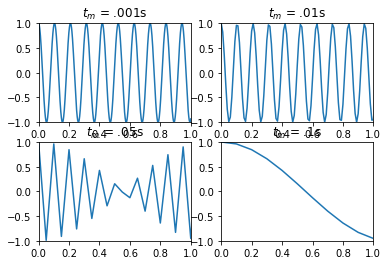

In [2]:
# Cuatro bases de tiempo, a cuatro velocidades de muestreo.
t1 = np.arange(0, 10, 0.001)
t2 = np.arange(0, 10, 0.01)
t3 = np.arange(0, 10, 0.05)
t4 = np.arange(0, 10, 0.1)

# Cuatro muestras de un coseno a 60 rad/seg
s1 = np.cos(60*t1)
s2 = np.cos(60*t2)
s3 = np.cos(60*t3)
s4 = np.cos(60*t4)

# Resultados muestran el efecto de diferentes frecuencias de muestreo y aliasing
# Gráficos de las cuatro muestras

plt.subplot(221)
plt.plot(t1,s1)
plt.axis([0, 1, -1, 1])
plt.title('$t_m$ = .001s')

plt.subplot(222)
plt.plot(t2,s2)
plt.axis([0, 1, -1, 1])
plt.title('$t_m$ = .01s')

plt.subplot(223)
plt.plot(t3,s3)
plt.axis([0, 1, -1, 1,])
plt.title('$t_m$ = .05s')

plt.subplot(224)
plt.plot(t4,s4)
plt.axis([0, 1, -1, 1])
plt.title('$t_m$ = .1s')

(0.0, 1.0, -1.0, 1.0)

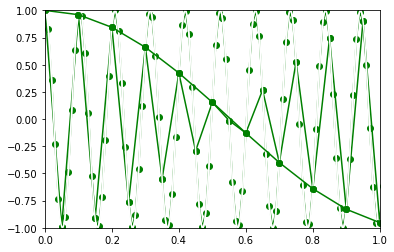

In [3]:
# Diferencias entre la primera y la segunda frecuencia de muestreo.

plt.subplot(111)
plt.plot(t1,s1,'w',t2,s2,'g-o')
plt.axis([0, 1, -1, 1])

# Diferencias entre la primera y la tercera frecuencia de muestreo

plt.plot(t1,s1,'w',t3,s3,'g-o')
plt.axis([0, 1, -1, 1,])

# Diferencias entre la primera y la cuarta frecuencia de muestreo

plt.plot(t1,s1,'w',t4,s4,'g-o')
plt.axis([0, 1, -1, 1])

Espectro de frecuencia: primera frecuencia de muestreo.

El pico está a 60 rad/seg.




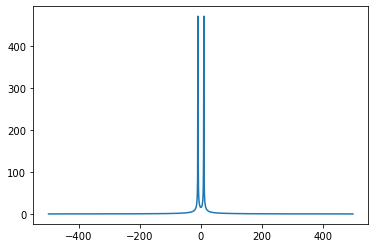

In [4]:
S1 = fftshift(abs(fft(s1,1024)))
S2 = fftshift(abs(fft(s2,1024)))
S3 = fftshift(abs(fft(s3,1024)))
S4 = fftshift(abs(fft(s4,1024)))

w1 = np.arange(-500,500-1/1024,1000/1024)
plt.plot(w1,S1)

print('Espectro de frecuencia: primera frecuencia de muestreo.\n')
print('El pico está a 60 rad/seg.\n\n')

In [ ]:
w2 = np.arange(-50,50-1/1024,100/1024)
plt.plot(w2,S2)

print('Espectro de frecuencia: frecuencia de muestreo reducida a la mitad.\n')
print('El pico está a 60 rad/seg.\n\n')

In [ ]:
w3 = np.arange(-25,25-1/1024,50/1024)
plt.plot(w3,S3)

print('Espectro de frecuencia: la frecuencia de muestreo se redujo a la mitad.\n')
print('El pico todavía está en 60 rad/seg, pero está cerca del borde.\n\n')

In [ ]:
w4 = np.arange(-5,5-1/1024,10/1024)
plt.plot(w4,S4)

print('Espectro de frecuencia: la frecuencia de muestreo se redujo a la mitad.\n')
print('El pico de 60 rad/seg ahora parece ser mucho más bajo.\n\n')

**Amplitud Modulada**

La modulación es importante porque nos permite transmitir señales a diferentes frecuencias. Considere los sistemas de radio de AM: todas las señales de audio son señales de banda base que comprenden frecuencias en el espectro audible. Al usar AM, las señales de audio que transmiten las diferentes estaciones se desplazan a diferentes bandas de frecuencia, cada una centrada alrededor de la frecuencia indicada en el dial de su radio. De esta forma, las señales de diferentes estaciones no interfieren entre sí, lo que provocaría distorsión en la señal recibida. Si no se usara modulación, todas las señales de radio se transmitirían al mismo tiempo. En el mejor de los casos, solo podrá comprender la estación para la que la señal recibida en su casa es "más fuerte". En el peor de los casos, las señales de todas las estaciones simplemente se sumarían, creando una increíble cacofonía de sonidos disonantes, que no podría apagar.

AM es un subconjunto del grupo de técnicas de modulación que se dice que son lineales. Dichas técnicas incluyen modulación de doble banda lateral, modulación de banda lateral superior, modulación de banda lateral inferior y AM. Todas estas técnicas de modulación lineal son similares, en el sentido de que desplazan la señal de entrada hasta una frecuencia transmisible modulando la señal original utilizando una sinusoide; Las diferencias en el ancho de banda y las bandas de frecuencia en las que se utilizan estos métodos dan lugar a diferencias importantes en la implementación y la aplicación.

Es importante que tenga en cuenta que el proceso es más complejo que la explicación simplificada que se presenta aquí, pero una discusión de estos métodos está más allá del alcance de esta tarea. 

En AM, la señal portadora se transmite junto con la información en la señal, lo que permite la demodulación (es decir, la recuperación de la señal de audio) utilizando circuitos de detección de envolvente de bajo costo. La señal de entrada se escala para tener un valor mínimo no inferior a —1. La fórmula para AM viene dada por la Ecuación 1 a continuación

1. Fórmula de modulación de amplitud 
$$
x(t) = A_c \left[1 + a x(t) \right] \cos (\omega_c t)
$$

donde $A_c$ es la amplitud de la señal portadora, $a$ es el índice de modulación, que escala la señal para asegurarse de que su valor mínimo sea aproximadamente -1, y $\omega_c$ es la frecuencia de la señal portadora.

Considere la modulación de una forma de onda simple $2 \cos (4 \pi t)$ usando una onda portadora de 100 Hz. Un índice de modulación de 0,5 proporciona la escala adecuada. Si dejamos que la amplitud de la portadora sea 1, entonces la señal de salida modulada es como se muestra en la Figura 5.3.

<img src="./fig53.png" width="500">
<center>Figura 5.3 Señal desplazada y salida modulada</center>

Puede ver claramente las formas de onda portadora y moduladora. Observe que la envolvente de la señal modulada es la forma de la señal original, escalada por el índice de modulación con un desplazamiento constante de 1 en el eje vertical.

Podemos demodular esta señal multiplicando por una segunda sinusoide en la frecuencia portadora, $\cos(\omega_0 t)$, lo que da como resultado una señal $r(t) = x_c(t)\cos (\omega_0 t)$. Cuando se expresa en términos de la señal de audio original, se puede ver que $r(t)$ incluye un término $\cos^2 (\omega_0 t)$. Sustituir la identidad trigonométrica $\cos^2 (\omega_0t) = \left[1 + \cos (2\omega_0t)\right] / 2$ en esta expresión para $r(t)$ da como resultado

$$
r(t) = \frac{1}{2} A_c \left[1 + a x(t) \right] \left[ 1 + \cos(2 \omega_0 t ) \right]
$$

De $r(t)$, podemos recuperar la señal de audio original $x(t)$ filtrando la sinusoide de alta frecuencia en $2\omega_0$ (asumiendo que $\omega_0$ es grande) usando un LPF que tiene una ganancia de 2. Mientras que la teoría sugiere que este método de demodulación funcionará, en la práctica a menudo es difícil hacer coincidir exactamente la frecuencia y la fase de la portadora, ya que puede variar durante la transmisión y tales circuitos son costosos.

Recuerde que la envolvente de la señal modulada corresponde a la señal original. En la práctica, a menudo se utiliza un circuito de detección de envolvente simple y de bajo costo, como el que se muestra en la Figura 5.4, para recuperar la forma de onda de la señal original a partir de la señal modulada.

<img src="./fig54.png" width="500">
<center>Figura 5.4 Circuito de detección de envolvente pasiva</center>

El diodo, $R_1$ y $C_1$ actúan como un detector de envolvente al permitir que los picos de la forma de onda carguen el capacitor, que no se descarga completamente antes de que ocurra el siguiente pico. Funciona de manera similar a un rectificador de media onda, excepto que la presencia de $R_1$ permite que el capacitor se descargue y, por lo tanto, siga una forma de onda cambiante. $R_2$ y $C_2$ forman un filtro de paso alto para eliminar el componente de DC $1/2A_c$, que es el resultado de transmitir la portadora con la señal modulada.

El circuito de detección de envolvente puede funcionar siempre que la frecuencia de la portadora sea mucho más alta que la frecuencia más alta presente en la señal. Si el filtro de paso bajo formado por $R_1$ y $C_1$ está configurado para cortar señales más altas que la frecuencia de señal más alta, entonces el tono de la portadora (que es significativamente más alto) debería desaparecer. De manera similar, el filtro de paso alto formado por $R_2$ y $C_2$ debería cortar el componente de DC de la señal.

Dado que el diodo es un dispositivo no lineal, es difícil simular este circuito con operaciones lineales estándar. En PYTHON, la forma más sencilla de realizar esta operación es simular la operación del diodo en el circuito R/C: si $v_{in}$ es mayor que el voltaje del capacitor, el voltaje del capacitor se carga a $v_{in}$. Si $v_{in}$ es más pequeño, el voltaje del capacitor se descarga a través de $R_1$. Esto se logra fácilmente usando bucles **for** y una instrucción **if**.

Debes hacer dos cosas:

1. Simule con éxito AM en PYTHON sin que se produzca ningún aliasing;
2. Demodular una señal AM con éxito en PYTHON, nuevamente sin ningún aliasing.

Estos son problemas no triviales. Deberá conocer el espectro de frecuencia de la señal de entrada, comprender cómo afecta la modulación a la señal y ser capaz de solucionar cualquier problema que surja. Tenga cuidado con los aliasing. Recuerde que las señales largas requieren una gran cantidad de cálculos, así que tenga paciencia con su computadora, está pensando lo más rápido que puede.

**Problema 1**. Modular la señal $x(t) = \cos (10\pi t)$ usando una frecuencia portadora de 100 Hz. Puede elegir la frecuencia de muestreo. La amplitud de la portadora debe ser 1. Escuche la forma de onda de salida y trace el espectro de frecuencia.

**Problema 2**. Modular la señal que se encuentra en el archivo P_1.wav usando una portadora de 8 kHz; tenga en cuenta que esta frecuencia portadora está en el espectro audible. La señal es una muestra de una persona hablando. Intente escuchar la señal. Determine el espectro de frecuencia de la señal y elimine cualquier aliasing. Tendrá que cambiar la frecuencia de muestreo dejando intacta la integridad de la señal.

In [1]:
%%HTML
<audio controls>
  <source src="./P_1.wav">
</audio>

**Problema 3**. Demodular la señal que creó en el problema 1. Asegúrese de que la salida coincida con la entrada (excepto por la amplitud). Puede emular el comportamiento del circuito de detección de envolvente o la técnica matemática de filtro.

**Problema 4**. Demodular la señal que se encuentra en el archivo P_2.wav. Debe determinar la frecuencia portadora y el ancho de banda de la señal antes de aplicarle cualquier técnica de demodulación. Escuchar la salida demodulada debería ayudarlo a saber cuándo ha logrado los resultados correctos, ya que el resultado debe ser comprensible.

In [6]:
%%HTML
<audio controls>
  <source src="./P_2.wav">
</audio>

## 7. Experimento con Hardware

Debe demodular una señal AM con éxito utilizando el circuito de detección de envolvente. Necesitará una etapa de amplificación después de la demodulación para que pueda escuchar la salida de audio con un par de auriculares.

**Problema 5**. Demodular la señal que creó en el Problema 1. Reproduzca la señal modulada y alimente la salida a su circuito de detección de envolvente. Mire la salida con un osciloscopio; debería ver una forma de onda de coseno de 5 Hz.

**Problema 6**. Demodular la señal que se encuentra en el archivo P_2.wav. Reproduzca la señal modulada y alimente la salida a su circuito de detección de envolvente. Escuche la salida de su demodulación; debe ser coherente.